In [42]:
import numpy as np
import cv2
from ciirc_utils import showimage, resize, dilate

In [43]:
im1 = cv2.imread('data/utm_00000.mask.png')
im2 = cv2.imread('data/utm_00002.mask.png') # Resize the second image to be the same as the first
im3 = cv2.imread('data/utm_00029.mask.png')

In [44]:
def binary_and(*image_list):
    if len(image_list) == 0:
        raise Exception("The list should not be empty!")
     
    background = image_list[0].copy()
    background_dst = background.astype(np.uint8)
    
    for image in image_list[1:]:
        # Take only region of logo from logo image.
        image_dst = image.astype(np.uint8)
        background_dst = cv2.bitwise_and(background_dst, image_dst)
        
    return background_dst

In [45]:
def binary_not(image):
    # Invert the colors of the image
    
    inverted_dst = image.astype(np.uint8)
    inverted_image = cv2.bitwise_not(inverted_dst)
    return inverted_image

In [46]:
def compose(*image_list):
    # Error checking
    if len(image_list) == 0:
        raise Exception("The list should not be empty!")
    
    
    background = image_list[0].copy()
    
    for image in image_list[1:]:
        # Take only region of logo from logo image.
        indices = np.all(image != [0,0,0], axis=-1)
        print(indices)
        background[indices] = image[indices]
    return background

In [53]:
def binary_or(image1, image2):
    # Invert the colors of the image
    
    inverted_dst1 = image1.astype(np.uint8)
    inverted_dst2 = image2.astype(np.uint8)
    inverted_image = cv2.bitwise_or(inverted_dst1, inverted_dst2)
    return inverted_image

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


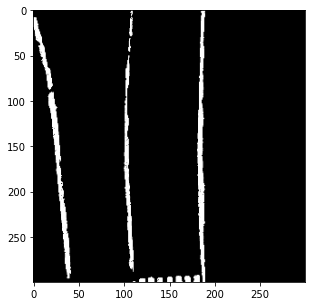

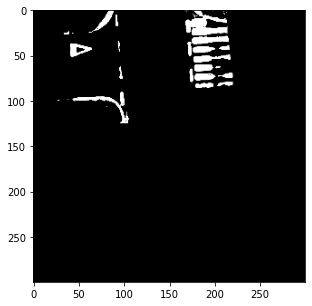

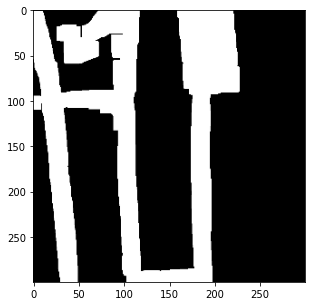

In [54]:
showimage(resize(im1, 300, 300), cmap="gray", figsize=[5, 5])
showimage(resize(im2, 300, 300), cmap="gray", figsize=[5, 5])
# showimage(resize(im3, 300, 300), cmap="gray", figsize=[5, 5])


result = binary_and(dilate(im1, kernel_size=(50, 50)), dilate(im2, kernel_size=(50, 50)))
# showimage(resize(result, 300, 300), cmap="gray", figsize=[5, 5])

result = binary_or(dilate(im1, kernel_size=(50, 50)), dilate(im2, kernel_size=(50, 50)))
showimage(resize(result, 300, 300), cmap="gray", figsize=[5, 5])


result = compose(im1, im2)
# showimage(resize(result, 300, 300), cmap="gray", figsize=[5, 5])